<a href="https://colab.research.google.com/github/Mr112004/INTERNSHIP----2/blob/main/TASK_3_UNEMPLOYEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3-813739419.py:22: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


📄 First 5 rows of the data:
            State       Date Frequency  Unemployment_Rate  Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48  16635535   
1  Andhra Pradesh 2020-02-29         M               5.83  16545652   
2  Andhra Pradesh 2020-03-31         M               5.79  15881197   
3  Andhra Pradesh 2020-04-30         M              20.51  11336911   
4  Andhra Pradesh 2020-05-31         M              17.43  12988845   

   Labour_Participation_Rate Region.1  longitude  latitude Month  
0                      41.02    South    15.9129     79.74   Jan  
1                      40.90    South    15.9129     79.74   Feb  
2                      39.18    South    15.9129     79.74   Mar  
3                      33.10    South    15.9129     79.74   Apr  
4                      36.46    South    15.9129     79.74   May  

🧼 Missing values:
 State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0

/tmp/ipython-input-3-813739419.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


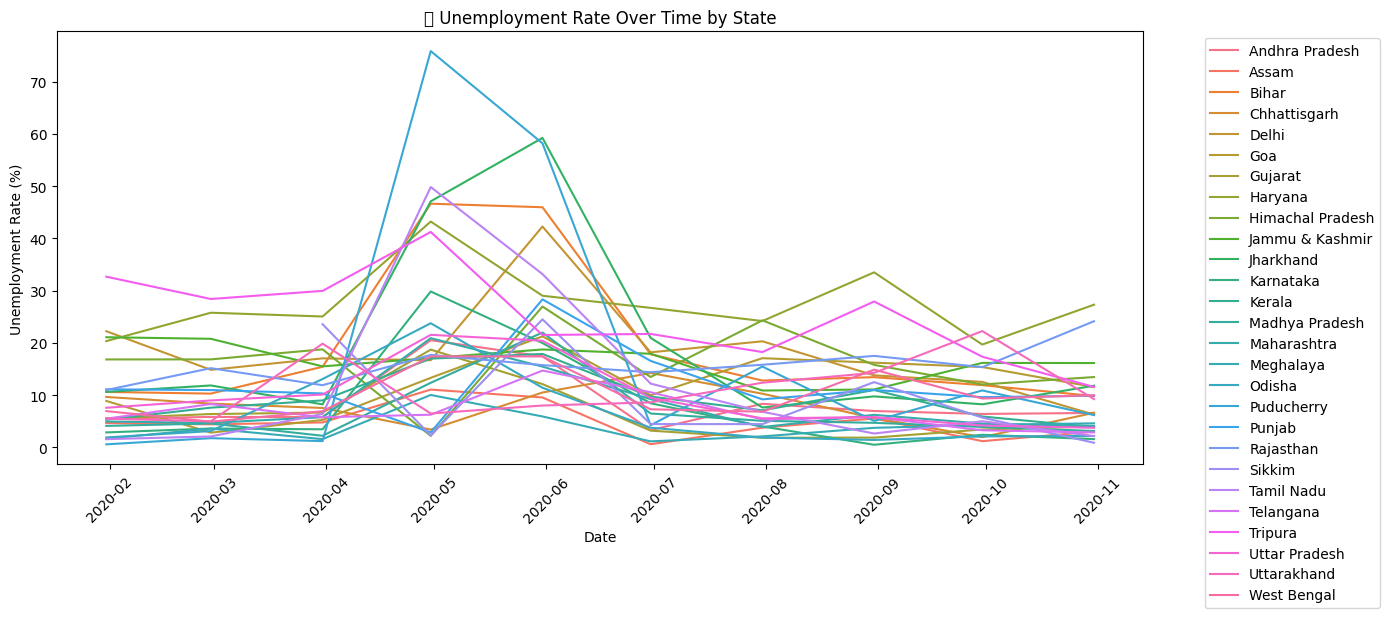

/tmp/ipython-input-3-813739419.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rate.values, y=avg_rate.index, palette='coolwarm')
/tmp/ipython-input-3-813739419.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


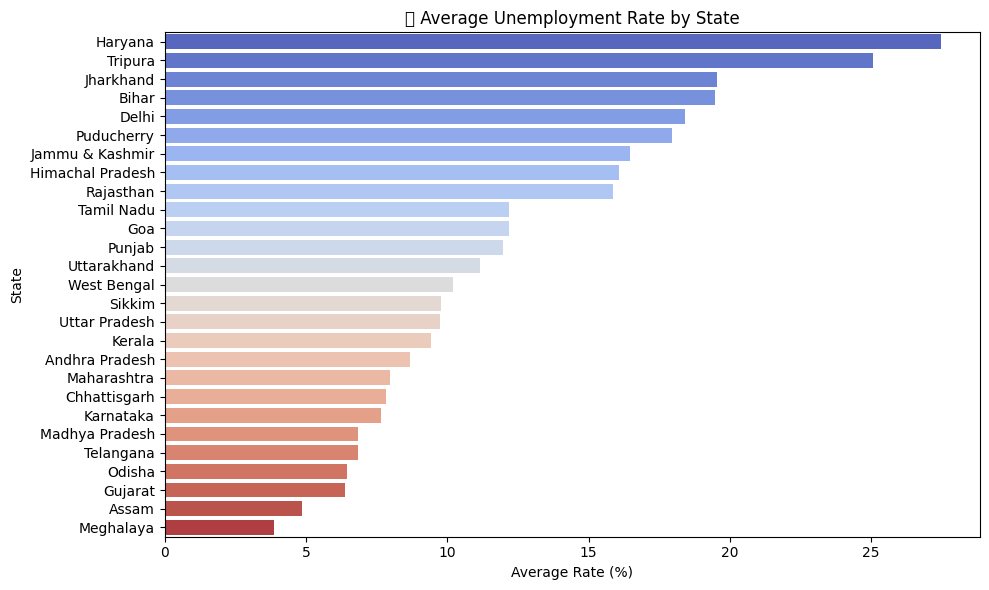

/tmp/ipython-input-3-813739419.py:60: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


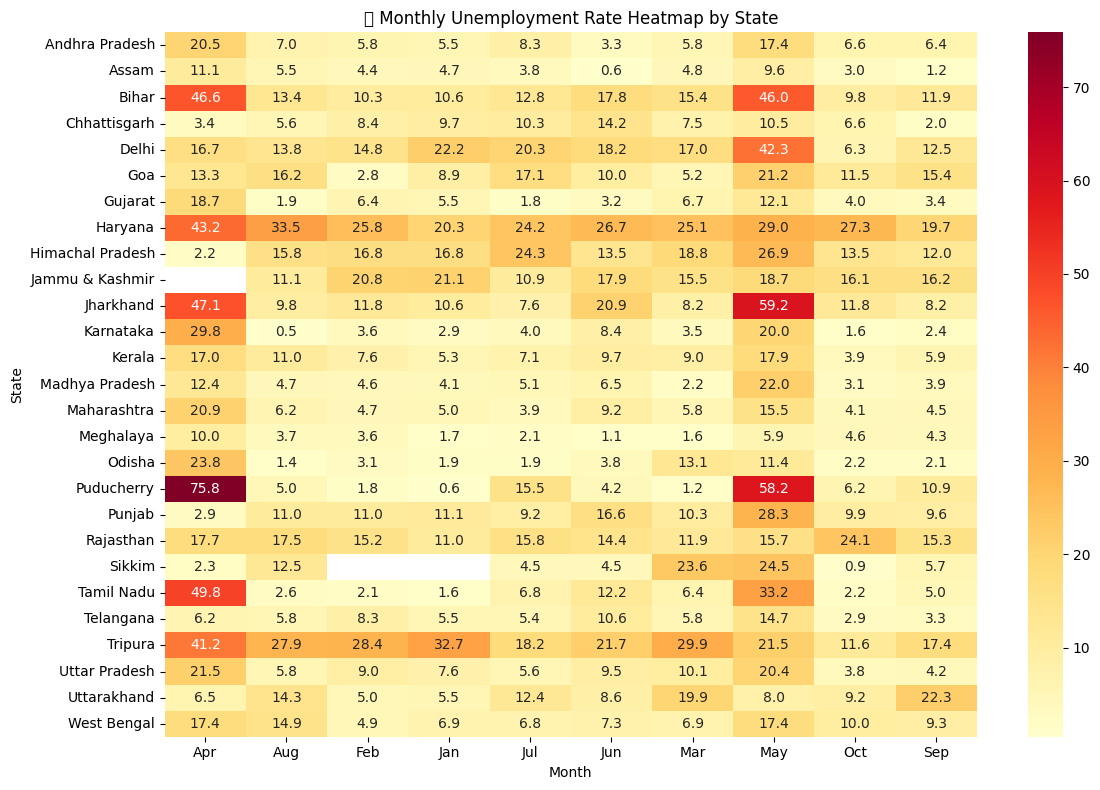

In [3]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Load the data
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# ✅ Step 2: Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# ✅ Step 3: Rename columns for simplicity
data.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Area': 'Area_Type'
}, inplace=True)

# ✅ Step 4: Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# ✅ Step 5: Add 'Month' column
data['Month'] = data['Date'].dt.strftime('%b')

# ✅ Step 6: Display basic info
print("📄 First 5 rows of the data:")
print(data.head())
print("\n🧼 Missing values:\n", data.isnull().sum())

# ✅ Step 7: Line Plot - Unemployment Rate over Time by State
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='Unemployment_Rate', hue='State')
plt.title("📈 Unemployment Rate Over Time by State")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ✅ Step 8: Bar Plot - Average Unemployment Rate by State
plt.figure(figsize=(10, 6))
avg_rate = data.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rate.values, y=avg_rate.index, palette='coolwarm')
plt.title("📊 Average Unemployment Rate by State")
plt.xlabel("Average Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# ✅ Step 9: Heatmap - Monthly Unemployment Rate per State
pivot_data = data.pivot_table(values='Unemployment_Rate', index='State', columns='Month')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("🔥 Monthly Unemployment Rate Heatmap by State")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()
